## Data Understanding


In [2]:
import pandas as pd 

cyclists_data = pd.read_csv("dataset/cyclists.csv")
races_data = pd.read_csv("dataset/races.csv")
cyclists_data.head()


,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [3]:
races_data.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


In [4]:
cyclists_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [5]:
races_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [6]:
duplicated_races = races_data[races_data.duplicated(keep=False)]
print(duplicated_races.shape)

duplicated_cyclists = cyclists_data[cyclists_data.duplicated(keep=False)]
print(duplicated_cyclists.shape)

# duplicated_races = duplicated_races.drop_duplicates()
# duplicated_cyclists = duplicated_cyclists.drop_duplicates()

(0, 18)
(0, 6)


### Analize missing values

In [7]:
print(cyclists_data.shape)
print(cyclists_data.isnull().sum(),'\n')

print(round(cyclists_data.isnull().sum()*100/cyclists_data.shape[0],2).astype(str) + '%')
#cyclists_data = cyclists_data.dropna()
# #print(cyclists_data.isnull().sum())

(6134, 6)
_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64 

_url             0.0%
name             0.0%
birth_year      0.21%
weight         49.82%
height         48.76%
nationality     0.02%
dtype: object


In [8]:
print(races_data.shape)
print(races_data.isnull().sum())

#print(round(races_data.isnull().sum()*100/races_data.shape[0],2).astype(str) + '%')
#races_data = races_data.dropna()
#races_data.isnull().sum()

(589865, 18)
_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64


### Analize Outliers

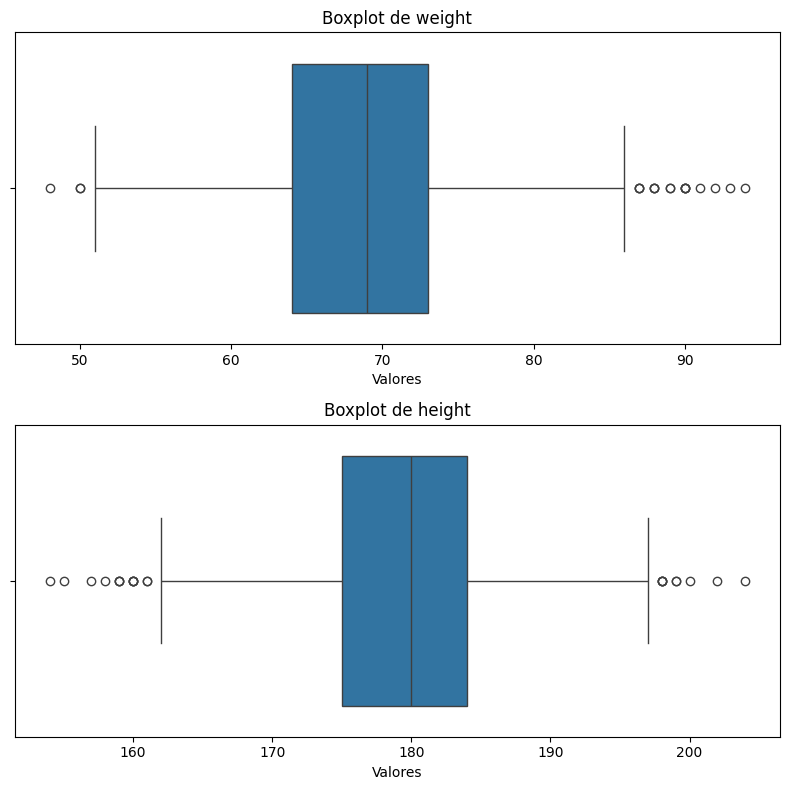

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas que quieres graficar
columns_to_plot = ['weight', 'height']  # Especifica las columnas que deseas

# Crear un gráfico de boxplot para cada columna seleccionada
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(num_columns, 1, figsize=(8, num_columns * 4))

# Graficar cada columna seleccionada por separado
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=cyclists_data, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_xlabel('Valores')

plt.tight_layout()  # Ajustar el layout
plt.show()


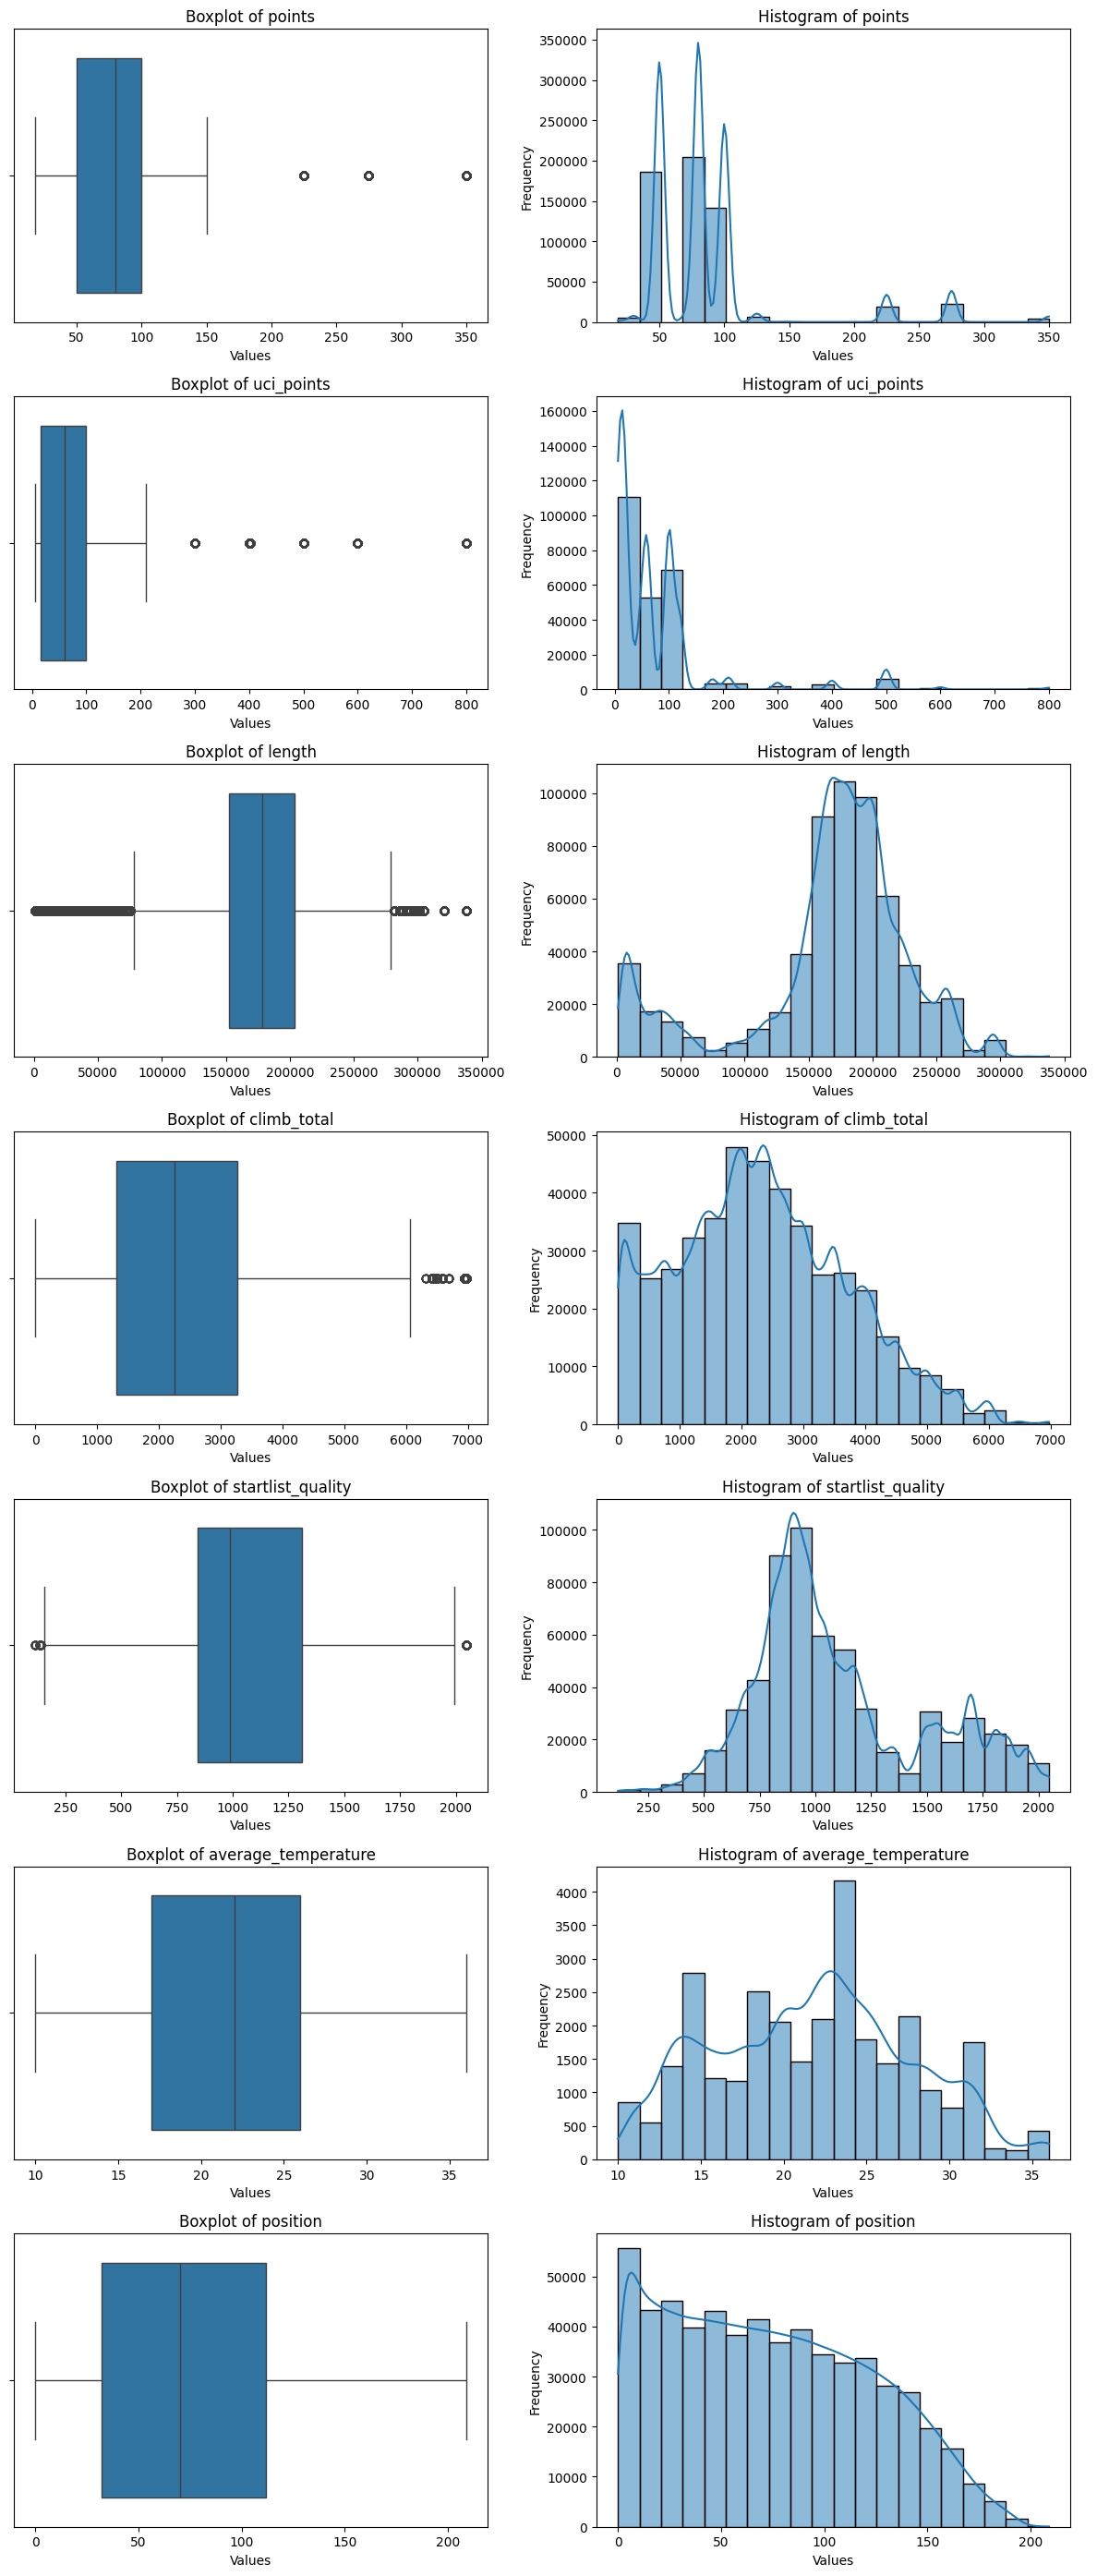

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns you want to plot
columns_to_plot = ['points', 'uci_points', 'length', 'climb_total', 'startlist_quality', 'average_temperature', 'position']

# Create a subplot grid with two columns for each feature
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(num_columns, 2, figsize=(12, num_columns * 4))  # Adjust figure size

# Plot each specified column individually
for i, column in enumerate(columns_to_plot):
    # Boxplot on the left
    sns.boxplot(data=races_data, x=column, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel('Values')

    # Histogram on the right
    sns.histplot(data=races_data, x=column, kde=True, ax=axes[i, 1], bins=20)
    axes[i, 1].set_title(f'Histogram of {column}')
    axes[i, 1].set_xlabel('Values')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
